In [1]:
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [10]:
url_client = 'TOOL_CLIENT.csv'
url_sales = './data/TOOL_SALES.csv'
sep = ','

client_data = pd.read_csv(url_client, sep=sep)

sales_data = pd.read_csv(url_sales, sep=sep)

In [11]:
sales_data

,YYYYMM,ITEM_ID,FLG_TOOL,SALES_CHANNEL,NET,UNIT,FAMILY_CODE,GROUP_CODE,CLIENT_ID,CANCELLED
0,201701,54,0,B,24.78,P,XBAM2HA,XBAM2HA0201,15674,NaN
1,201701,44,0,B,34.62,P,XBAM2HA,XBAM2HA0201,62486,NaN
2,201701,47,0,D,46.45,P,XBAM2HA,XBAM2HA0201,60149,NaN
3,201701,52,0,B,62.15,P,XBAM2HA,XBAM2HA0201,42371,NaN
4,201701,56,0,B,35.80,P,XBAM2HA,XBAM2HA0201,13144,NaN
...,...,...,...,...,...,...,...,...,...,...
2050444,202112,13679,0,C,58.98,P,XBAL2AA,XBAL2AA0401,90423,NaN
2050445,202112,13687,0,B,60.35,P,XBAL2AA,XBAL2AA0801,40827,NaN
2050446,202112,13679,0,B,60.35,P,XBAL2AA,XBAL2AA0401,48838,NaN
2050447,202112,13671,0,B,75.84,P,XBAL2AA,XBAL2AA0102,9912,NaN


In [12]:
sales_data['YYYYMM'].unique()

array([201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004,
       202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012,
       202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108,
       202109, 202110, 202111, 202112], dtype=int64)

In [50]:
# Assuming your DataFrame is named 'sales_data' and 'Date' column contains integers in YYYYMM format

# Convert 'Date' column to string
sales_data['Date'] = sales_data['YYYYMM'].astype(str)

# Insert '-' character between year and month to make it YYYY-MM format
sales_data['Date'] = sales_data['Date'].str.slice(0, 4) + '-' + sales_data['Date'].str.slice(4, 6)

# Convert 'Date' column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%Y-%m')


sales_data['Date'].unique()
# Extract year and month from the 'Date' column
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month



In [176]:
sales_data['Year'].unique()
sales_data['Month'].unique()


array([2019, 2017, 2018, 2020, 2021])

In [52]:
sales_data

,YYYYMM,ITEM_ID,FLG_TOOL,SALES_CHANNEL,NET,UNIT,FAMILY_CODE,GROUP_CODE,CLIENT_ID,CANCELLED,Date,Year,Month
0,201701,54,0,B,24.78,P,XBAM2HA,XBAM2HA0201,15674,NaN,2017-01-01,2017,1
1,201701,44,0,B,34.62,P,XBAM2HA,XBAM2HA0201,62486,NaN,2017-01-01,2017,1
2,201701,47,0,D,46.45,P,XBAM2HA,XBAM2HA0201,60149,NaN,2017-01-01,2017,1
3,201701,52,0,B,62.15,P,XBAM2HA,XBAM2HA0201,42371,NaN,2017-01-01,2017,1
4,201701,56,0,B,35.80,P,XBAM2HA,XBAM2HA0201,13144,NaN,2017-01-01,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050444,202112,13679,0,C,58.98,P,XBAL2AA,XBAL2AA0401,90423,NaN,2021-12-01,2021,12
2050445,202112,13687,0,B,60.35,P,XBAL2AA,XBAL2AA0801,40827,NaN,2021-12-01,2021,12
2050446,202112,13679,0,B,60.35,P,XBAL2AA,XBAL2AA0401,48838,NaN,2021-12-01,2021,12
2050447,202112,13671,0,B,75.84,P,XBAL2AA,XBAL2AA0102,9912,NaN,2021-12-01,2021,12


In [24]:
client_data

,CLIENT_ID,CLIENT_CREATE DATE,REGION,TRADE SECTOR,N_EMPLOYEES,ECONOMIC_POT,ECO_POT_CLASS,RISK_CAT
0,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d
1,939,2005-11-15 00:00:00,LE,15500,2,681.26,E,3d
2,8321,2005-11-15 00:00:00,LE,15500,2,681.26,E,T8
3,4174,2005-11-15 00:00:00,BZ,15400,1,494.45,E,3d
4,12765,2005-11-15 00:00:00,BZ,15400,1,494.45,E,3b
...,...,...,...,...,...,...,...,...
93252,93242,2021-12-23 00:00:00,PD,14000,1,1933.89,E,5d
93253,93237,2021-12-23 00:00:00,TO,11000,5,7547.54,D,5d
93254,93257,2021-12-23 00:00:00,RE,11000,1,1509.51,E,5d
93255,93224,2021-12-23 00:00:00,RM,13500,4,8864.84,D,5d


In [47]:
client_data['ECONOMIC_POT'].value_counts


<bound method IndexOpsMixin.value_counts of 0        8659.81
1         681.26
2         681.26
3         494.45
4         494.45
          ...   
93252    1933.89
93253    7547.54
93254    1509.51
93255    8864.84
93256    1509.51
Name: ECONOMIC_POT, Length: 93257, dtype: float64>

In [34]:
sales_data['CLIENT_ID'].is_unique

False

In [7]:
sales_data['CANCELLED'].unique()

array([nan, 'X'], dtype=object)

In [180]:
#sales_data = sales_data.drop('Recency', axis=1)
#sales_data['Month'] = sales_data['Date'].dt.month

# Convert 'Date' column to datetime format
#sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%Y-%m')


last_purchase = sales_data.groupby('CLIENT_ID')['Year'].max()
sales_data['Recency'] = last_purchase


sales_data['Recency'].value_counts(dropna=False)



Recency
NaN       1957192
2021.0      37901
2020.0      15053
2018.0      13806
2019.0      13311
2017.0      13186
Name: count, dtype: int64

In [181]:
# Calculate recency of last purchase for each client
#last_purchase = sales_data.groupby('CLIENT_ID')['Year'].max()
#sales_data['Recency'] = (sales_data['Year'] - last_purchase)

# Calculate frequency of purchases for each client
purchase_frequency = sales_data.groupby('CLIENT_ID').size()
sales_data['Frequency'] = purchase_frequency

# Calculate total monetary value of purchases for each client
monetary_value = sales_data.groupby('CLIENT_ID')['NET'].sum()
sales_data['MonetaryValue'] = monetary_value


In [182]:
sales_data


,YYYYMM,ITEM_ID,FLG_TOOL,SALES_CHANNEL,NET,UNIT,FAMILY_CODE,GROUP_CODE,CLIENT_ID,CANCELLED,Date,Year,Month,Frequency,MonetaryValue,Reactivated,Recency
1282304,201911,13735,0,D,39.02,P,XAEC4AA,XAEC4AA0101,1,NaN,2019-11-01,2019,11,NaN,NaN,0,NaN
1282269,201911,13742,0,D,13.07,P,XAEC4AA,XAEC4AA0101,1,NaN,2019-11-01,2019,11,NaN,NaN,0,NaN
1282284,201911,13741,0,D,5.47,P,XAEC4AA,XAEC4AA0101,1,NaN,2019-11-01,2019,11,NaN,NaN,0,NaN
428477,201711,3352,1,D,271.56,P,XAEP3CC,XAEP3CC0301,2,NaN,2017-11-01,2017,11,NaN,NaN,0,NaN
682005,201806,9778,1,A,0.00,P,XAEP3CC,XAEP3CC0301,2,NaN,2018-06-01,2018,6,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020548,202112,585,1,B,112.53,P,XAEP3DA,XAEP3DA0203,93257,NaN,2021-12-01,2021,12,NaN,NaN,0,NaN
2023450,202112,4795,1,B,173.24,P,XAEP3CC,XAEP3CC0302,93257,NaN,2021-12-01,2021,12,NaN,NaN,0,NaN
2044860,202112,12155,1,B,0.00,P,XAEN1CB,XAEN1CB0701,93257,NaN,2021-12-01,2021,12,NaN,NaN,0,NaN
2023449,202112,4795,1,B,162.19,P,XAEP3CC,XAEP3CC0302,93257,NaN,2021-12-01,2021,12,NaN,NaN,0,NaN


In [199]:
sales_data['Recency'].value_counts()

Recency
2021.0    37901
2020.0    15053
2018.0    13806
2019.0    13311
2017.0    13186
Name: count, dtype: int64

In [205]:
# Define target variable
#sales_data = sales_data.drop('Reactivated', axis=1)

ref_year = 2022
sales_data['year_diff'] = ref_year - sales_data['Recency']


#sales_data['Reactivated'] = (ref_year - sales_data['Recency']).astype(int)  # 730 days = 2 years
sales_data['year_diff'].value_counts(dropna=False)

year_diff
NaN    1957192
1.0      37901
2.0      15053
4.0      13806
3.0      13311
5.0      13186
Name: count, dtype: int64

In [222]:
sales_data['Reactivated'] = (sales_data['year_diff'] > 2).astype(int)  # 2 because those to be activated must have last purchase on 2019 i.e has been inactive for at least 3 years (1 if yes, 0 if no)
sales_data['Reactivated'].value_counts(dropna=False)

Reactivated
0    2010146
1      40303
Name: count, dtype: int64

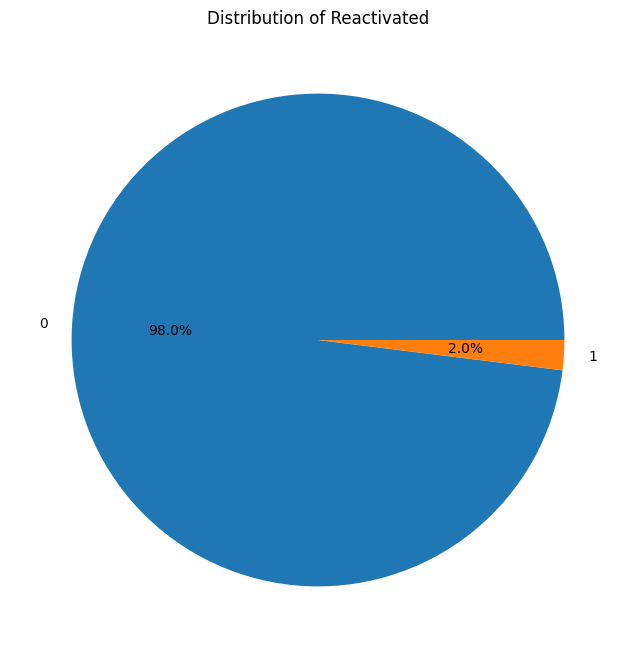

In [220]:
sales_data['Reactivated'].value_counts(sort=False).plot(
                        kind='pie'
                        , autopct='%1.1f%%'
                        , title="Distribution of Reactivated"
                        , ylabel=''
                        , figsize=(8,8)
                        );

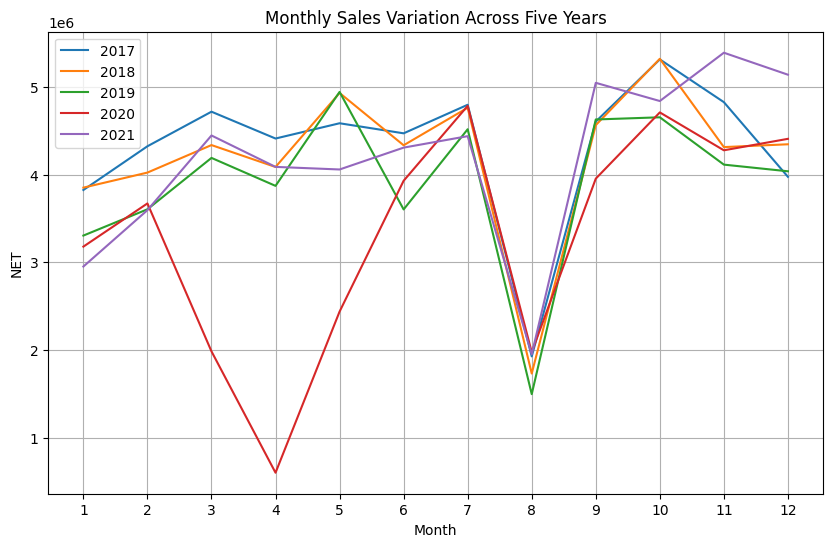

In [187]:



# Group by year and month, and sum the sales for each month
monthly_sales = sales_data.groupby(['Year', 'Month'])['NET'].sum()

# Reset index to make 'Year' and 'Month' columns accessible for plotting
monthly_sales = monthly_sales.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
for year in monthly_sales['Year'].unique():
    sales_for_year = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(sales_for_year['Month'], sales_for_year['NET'], label=str(year))

plt.title('Monthly Sales Variation Across Five Years')
plt.xlabel('Month')
plt.ylabel('NET')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))  # Set ticks for all 12 months
plt.show()

In [89]:
monthly_sales

,Year,Month,NET
0,2017,1,3825921.65
1,2017,2,4325014.17
2,2017,3,4719368.14
3,2017,4,4413189.44
4,2017,5,4587426.82
5,2017,6,4472618.64
6,2017,7,4798474.53
7,2017,8,1927214.65
8,2017,9,4606529.93
9,2017,10,5316158.22


In [188]:
Reactivated_count_year = sales_data.groupby(['Year'])['Reactivated'].value_counts(sort=True)

Reactivated_count_year = Reactivated_count_year.reset_index()
Reactivated_count_year

,Year,Reactivated,count
0,2017,0,391290
1,2017,1,93257
2,2018,0,451919
3,2019,0,404682
4,2020,0,334032
5,2021,0,375269


In [92]:
plt.figure(figsize=(10, 6))

plt


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>